<a href="https://colab.research.google.com/github/VitthalAPandhare/ml-projects/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [106]:
np.random.rand()

0.22828024869085384

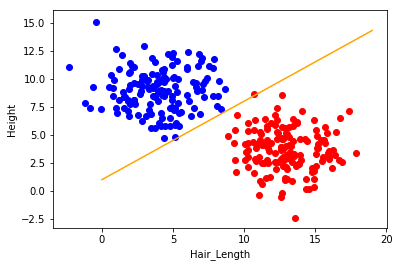

In [117]:
x1 = 2*np.random.randn(150) + 13
y1 = 2*np.random.randn(150) + 4
x2 = 2*np.random.randn(150) + 4
y2 = 2*np.random.randn(150) + 9
x = np.append(x1,x2)
y = np.append(y1,y2)

plt.scatter(x1,y1,c = 'red')
plt.scatter(x2,y2,c  = 'blue')
x_ = range(0,20)
y_ = [0.7*i + 1 for i in x_]
plt.plot(x_,y_,c ='orange')
plt.xlabel("Hair_Length")
plt.ylabel("Height")


plt.show()

In [118]:
import pandas as pd
df = pd.DataFrame()
df["Hair_Length"] = x 
df["Height"] = y
df.head()

,Hair_Length,Height
0,12.825544,2.718640
1,12.765578,2.989978
2,15.412700,4.553591
3,12.724529,3.740349
4,10.848169,3.790808


In [0]:
df["gender"]=list(map(lambda x : 1 if x[1] - 0.7*x[0] - 1 > -1 else 0, df.values ))

In [121]:
df.head()

,Hair_Length,Height,gender
0,12.825544,2.718640,0
1,12.765578,2.989978,0
2,15.412700,4.553591,0
3,12.724529,3.740349,0
4,10.848169,3.790808,0


In [122]:
[0.0 for i in range(len(df.values[0]))]

[0.0, 0.0, 0.0]

In [0]:
def activate(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

def get_weights(X, l_rate, n_epoch):
	weights = [0.0 for i in range(len(X[0]))]
	for epoch in range(n_epoch):
		for row in X:
			prediction = activate(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

def perceptron(X,l_rate, n_epoch):
	predictions = list()
	weights = get_weights(X, l_rate, n_epoch)
	for row in X:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return((predictions,weights))

In [0]:
prediction,weights = perceptron(df.values,0.05,1000)

In [0]:
bias,X_W,Y_W = weights[0],weights[1],weights[2]

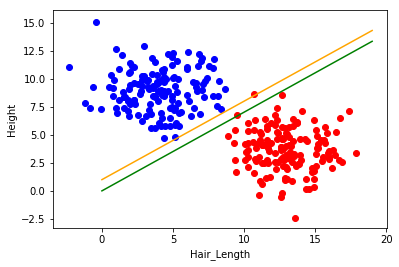

In [137]:
y_W= [-X_W/Y_W *i - bias/Y_W for i in x_]

plt.scatter(x1,y1,c = 'red')
plt.scatter(x2,y2,c  = 'blue')
x_ = range(0,20)
y_ = [0.7*i + 1 for i in x_]
plt.plot(x_,y_W,c ='green')
plt.plot(x_,y_,c ='orange')
plt.xlabel("Hair_Length")
plt.ylabel("Height")
plt.show()

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(df["gender"].values, prediction)

1.0